In [2]:
# Install packages
install.packages("readxl")
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpyxU0hk/downloaded_packages

The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpyxU0hk/downloaded_packages


In [3]:
#use the packages
library(readxl)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
# load the csv data and create your dataframe
my_pets <- read.csv("../Data/Pets.csv")

In [6]:
head(my_pets)

,Name,Animal,Age,Weight
,<chr>,<chr>,<int>,<dbl>
1,Bruno,Goat,4,35.00
2,Jacko,Goat,1,45.00
3,Sophie,Cat,12,3.50
4,Patches,Guinea Pig,2,2.00
5,Boozer,Gold Fish,3,0.04
6,Boozer,Gold Fish,2,0.03


In [5]:
# load the xlsx data and create your dataframe
my_petsExcel <- read_excel("../Data/Pets.xlsx")

In [7]:
head(my_petsExcel)

Name,Animal,Age,Weight
<chr>,<chr>,<dbl>,<dbl>
Bruno,Goat,4,35.00
Jacko,Goat,1,45.00
Sophie,Cat,12,3.50
Patches,Guinea Pig,2,2.00
Boozer,Gold Fish,3,0.04
Boozer,Gold Fish,2,0.03


In [8]:
# Suppose you wish to get all observations (rows) that contain goats. 
# You can do this with the following filter() function:

filter(my_pets, Animal == "Goat")


Name,Animal,Age,Weight
<chr>,<chr>,<int>,<dbl>
Bruno,Goat,4,35
Jacko,Goat,1,45


In [9]:
filter(my_pets, Animal == "Goat", Age <= 2)

Name,Animal,Age,Weight
<chr>,<chr>,<int>,<dbl>
Jacko,Goat,1,45


In [10]:
# Suppose you want all the observations of mammals in the data frame. You could do this as follows:
filter(my_pets, Animal %in% c("Goat", "Cat", "Guinea Pig"))

Name,Animal,Age,Weight
<chr>,<chr>,<int>,<dbl>
Bruno,Goat,4,35.0
Jacko,Goat,1,45.0
Sophie,Cat,12,3.5
Patches,Guinea Pig,2,2.0


In [11]:
filter(my_pets, Animal != "Gold Fish")

Name,Animal,Age,Weight
<chr>,<chr>,<int>,<dbl>
Bruno,Goat,4,35.0
Jacko,Goat,1,45.0
Sophie,Cat,12,3.5
Patches,Guinea Pig,2,2.0


In [12]:
mammals <- filter(my_pets, Animal != "Gold Fish")
mammals

Name,Animal,Age,Weight
<chr>,<chr>,<int>,<dbl>
Bruno,Goat,4,35.0
Jacko,Goat,1,45.0
Sophie,Cat,12,3.5
Patches,Guinea Pig,2,2.0


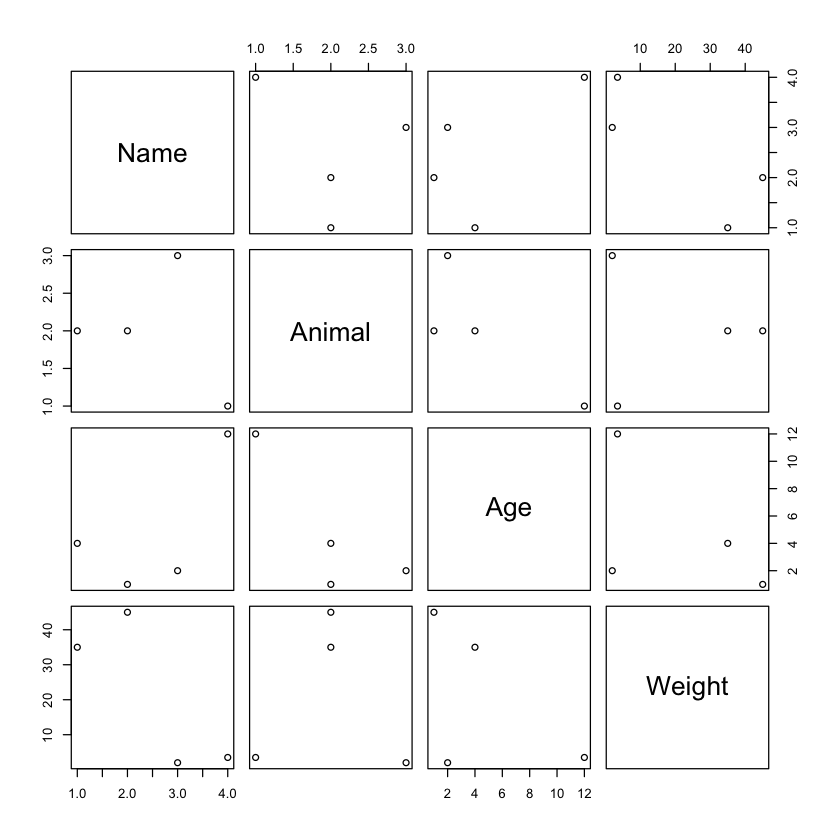

In [13]:
plot(mammals)

In [16]:
arrange(my_pets, Age)

Name,Animal,Age,Weight
<chr>,<chr>,<int>,<dbl>
Jacko,Goat,1,45.00
Patches,Guinea Pig,2,2.00
Boozer,Gold Fish,2,0.03
Boozer,Gold Fish,3,0.04
Bruno,Goat,4,35.00
Sophie,Cat,12,3.50


In [17]:
my_pets %>% filter(Animal != "Gold Fish") %>% arrange(Age)

Name,Animal,Age,Weight
<chr>,<chr>,<int>,<dbl>
Jacko,Goat,1,45.0
Patches,Guinea Pig,2,2.0
Bruno,Goat,4,35.0
Sophie,Cat,12,3.5


In [18]:
select(my_pets, Name, Animal)

Name,Animal
<chr>,<chr>
Bruno,Goat
Jacko,Goat
Sophie,Cat
Patches,Guinea Pig
Boozer,Gold Fish
Boozer,Gold Fish


In [19]:
mutate(my_pets, Weight_kg = Weight/2.20462)

Name,Animal,Age,Weight,Weight_kg
<chr>,<chr>,<int>,<dbl>,<dbl>
Bruno,Goat,4,35.00,15.87575183
Jacko,Goat,1,45.00,20.41168092
Sophie,Cat,12,3.50,1.58757518
Patches,Guinea Pig,2,2.00,0.90718582
Boozer,Gold Fish,3,0.04,0.01814372
Boozer,Gold Fish,2,0.03,0.01360779


In [20]:
mutate(my_pets, Status = "Alive")

Name,Animal,Age,Weight,Status
<chr>,<chr>,<int>,<dbl>,<chr>
Bruno,Goat,4,35.00,Alive
Jacko,Goat,1,45.00,Alive
Sophie,Cat,12,3.50,Alive
Patches,Guinea Pig,2,2.00,Alive
Boozer,Gold Fish,3,0.04,Alive
Boozer,Gold Fish,2,0.03,Alive


In [21]:
summarize(my_pets, ave_age = mean(Age))

ave_age
<dbl>
4


In [22]:
my_pets %>% group_by(Animal) %>% summarize(ave.age = mean(Age))

Animal,ave.age
<chr>,<dbl>
Cat,12.0
Goat,2.5
Gold Fish,2.5
Guinea Pig,2.0


In [23]:
my_pets %>% group_by(Animal) %>% summarize(count = n())

Animal,count
<chr>,<int>
Cat,1
Goat,2
Gold Fish,2
Guinea Pig,1


In [24]:
my_pets %>% group_by(Name, Animal) %>% summarize(count = n())

`summarise()` has grouped output by 'Name'. You can override using the `.groups` argument.



Name,Animal,count
<chr>,<chr>,<int>
Boozer,Gold Fish,2
Bruno,Goat,1
Jacko,Goat,1
Patches,Guinea Pig,1
Sophie,Cat,1


In [25]:
head(morley)

,Expt,Run,Speed
,<int>,<int>,<int>
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850


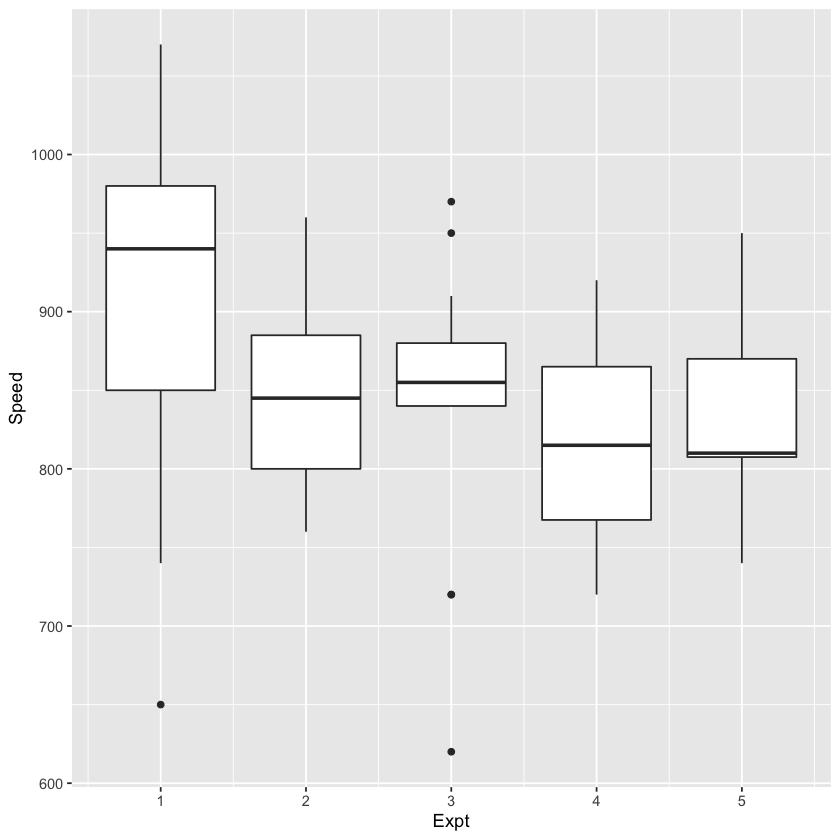

In [26]:
ggplot(morley, aes(x = Expt, y = Speed)) + geom_boxplot(aes(group=Expt))

In [27]:
morley %>% group_by(Expt) %>% summarize(m.speed = mean(Speed))

Expt,m.speed
<int>,<dbl>
1,909.0
2,856.0
3,845.0
4,820.5
5,831.5
